In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from random import randint
import seaborn as sns
import scipy
from scipy import stats
import xgboost as xgb

### Загрузка данных и переименование некоторых переменных для удобства

In [4]:
df19= pd.read_csv("counterparty-analysis/agents2019.csv").drop('Unnamed: 0', axis=1)
df20= pd.read_csv("counterparty-analysis/agents2020.csv")
df21= pd.read_csv("counterparty-analysis/agents2021.csv").drop('Unnamed: 0', axis=1)

In [5]:
df19.rename({'Макс. ПДЗ за 2019 год, дней' : 'target_max',
               'Сред. ПДЗ за 2019 год, дней' : 'target_mean',
                'Кол-во просрочек свыше 5-ти дней за 2019 год, шт.' : 'target_count_5',
                'Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.' : 'target_sum_5',
                'Кол-во раз ПДЗ за 2019 год, шт.' : 'target_count'
               }, axis=1, inplace=True)

### Визуализация данных

In [7]:
df19.head()

,Наименование ДП,target_max,target_mean,target_count_5,target_sum_5,target_count,"2016, Нематериальные активы, RUB","2017, Нематериальные активы, RUB","2018, Нематериальные активы, RUB","2016, Основные средства , RUB",...,"2018, Выручка, RUB","2016, Себестоимость продаж, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2016, Прибыль (убыток) от продажи, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB"
0,0,0,0.0,0,0.000000,0,2.895541e+06,6.245860e+06,9.050955e+06,1.889724e+09,...,3.703952e+10,2.156814e+10,3.335443e+10,3.438313e+10,3.179697e+09,6.167667e+09,7.461828e+08,3.280355e+09,6.200120e+09,8.716191e+08
1,1,0,0.0,0,0.000000,0,0.000000e+00,3.885350e+04,3.439490e+04,1.448108e+08,...,5.434306e+08,2.056815e+08,2.055325e+08,4.169796e+08,1.212357e+07,6.944586e+06,4.480064e+07,1.630064e+07,1.109172e+07,5.135732e+07
2,2,7,5.5,1,132825.299363,2,2.468153e+06,1.288025e+07,8.694904e+06,9.698064e+08,...,2.592420e+09,2.038076e+09,2.178598e+09,2.316724e+09,5.026662e+08,3.644229e+08,8.552994e+07,4.148586e+08,1.611318e+08,-9.298981e+07
3,3,0,0.0,0,0.000000,0,0.000000e+00,0.000000e+00,0.000000e+00,8.874127e+09,...,2.165799e+10,1.014149e+10,1.063542e+10,1.171315e+10,4.100857e+09,4.481281e+09,6.840634e+09,4.903117e+09,5.186553e+09,7.869977e+09
4,4,2,2.0,0,0.000000,2,5.503185e+05,5.210191e+05,4.490446e+05,2.633161e+10,...,8.611910e+10,1.950167e+10,2.340042e+10,2.652547e+10,7.163980e+10,3.799862e+10,4.593606e+10,2.338912e+10,3.727984e+10,5.307524e+10


In [10]:
df20.head()

,Наименование ДП,Факт. 1,Факт. 2,Факт. 3,Факт. 4,Факт. 5,Факт. 6,Факт. 7,Факт. 8,Факт. 9,...,"2018, Себестоимость продаж, RUB","2019, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2019, Прибыль (убыток) до налогообложения , RUB","2016, Прибыль (убыток) от продажи, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB","2019, Прибыль (убыток) от продажи, RUB"
0,0,Х,Х,Х,Х,Х,Х,Х,Х,Х,...,3.438313e+10,2.673481e+10,3.179697e+09,6.167667e+09,7.461828e+08,3.603784e+09,3.280355e+09,6.200120e+09,8.716191e+08,3.658634e+09
1,1,Х,Х,Х,Х,Х,Х,Х,Х,Х,...,4.169796e+08,5.349955e+08,1.212357e+07,6.944586e+06,4.480064e+07,8.747516e+07,1.630064e+07,1.109172e+07,5.135732e+07,9.411019e+07
2,2,Х,Х,Х,Х,Х,Х,Х,Х,Х,...,2.316724e+09,2.460679e+09,5.026662e+08,3.644229e+08,8.552994e+07,-6.456439e+08,4.148586e+08,1.611318e+08,-9.298981e+07,-1.207210e+08
3,3,Х,Х,Х,Х,Х,Х,Х,Х,Х,...,1.171315e+10,1.272604e+10,4.100857e+09,4.481281e+09,6.840634e+09,3.999298e+09,4.903117e+09,5.186553e+09,7.869977e+09,4.029232e+09
4,4,Х,Х,Х,Х,Х,Х,Х,Х,Х,...,2.652547e+10,3.055828e+10,7.163980e+10,3.799862e+10,4.593606e+10,4.960408e+10,2.338912e+10,3.727984e+10,5.307524e+10,5.622122e+10


In [11]:
df21.head()

,Наименование ДП,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.","Макс. ПДЗ за 2020 год, дней","Сред. ПДЗ за 2020 год, дней","Кол-во просрочек свыше 5-ти дней за 2020 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.",...,Факт 7,Факт 12,Факт 14,Факт 15,Факт 16,Итого,ПДЗ 1-30,ПДЗ 31-90,ПДЗ 91-365,ПДЗ более 365
0,0,0,0.0,0,0.000000,0,10,6.400000,4,2.229696e+06,...,NaN,NaN,NaN,NaN,NaN,5.0,0,0,1,1
1,2,7,5.5,1,132825.299363,2,6,5.333333,2,3.759242e+06,...,NaN,NaN,NaN,NaN,NaN,25.0,0,0,1,1
2,4,2,2.0,0,0.000000,2,1,1.000000,0,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,10.0,0,0,0,0
3,5,0,0.0,0,0.000000,0,21,17.666667,5,4.486079e+06,...,NaN,NaN,NaN,NaN,NaN,20.0,0,0,0,1
4,6,0,0.0,0,0.000000,0,0,0.000000,0,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,20.0,0,0,0,0


Рассмотрим данные 2019 года. Проанализируем зависимости между имеющимися признаками\
Матрица корреляции (Пирсон) между признаками 2019 года
### Выводы: 
Данные по одному признаку от разных годов зависимы
#### Между собой коррелируют: 
Основные средства и внеоборотные активы
Дебиторская задолженность и оборотные активы
Уставный капитал и капитал и резервы
Заемные средства и долгосрочные обязательства
Кредиторская задолженность, кредиторские обязательства, выручка и себестоимость продаж



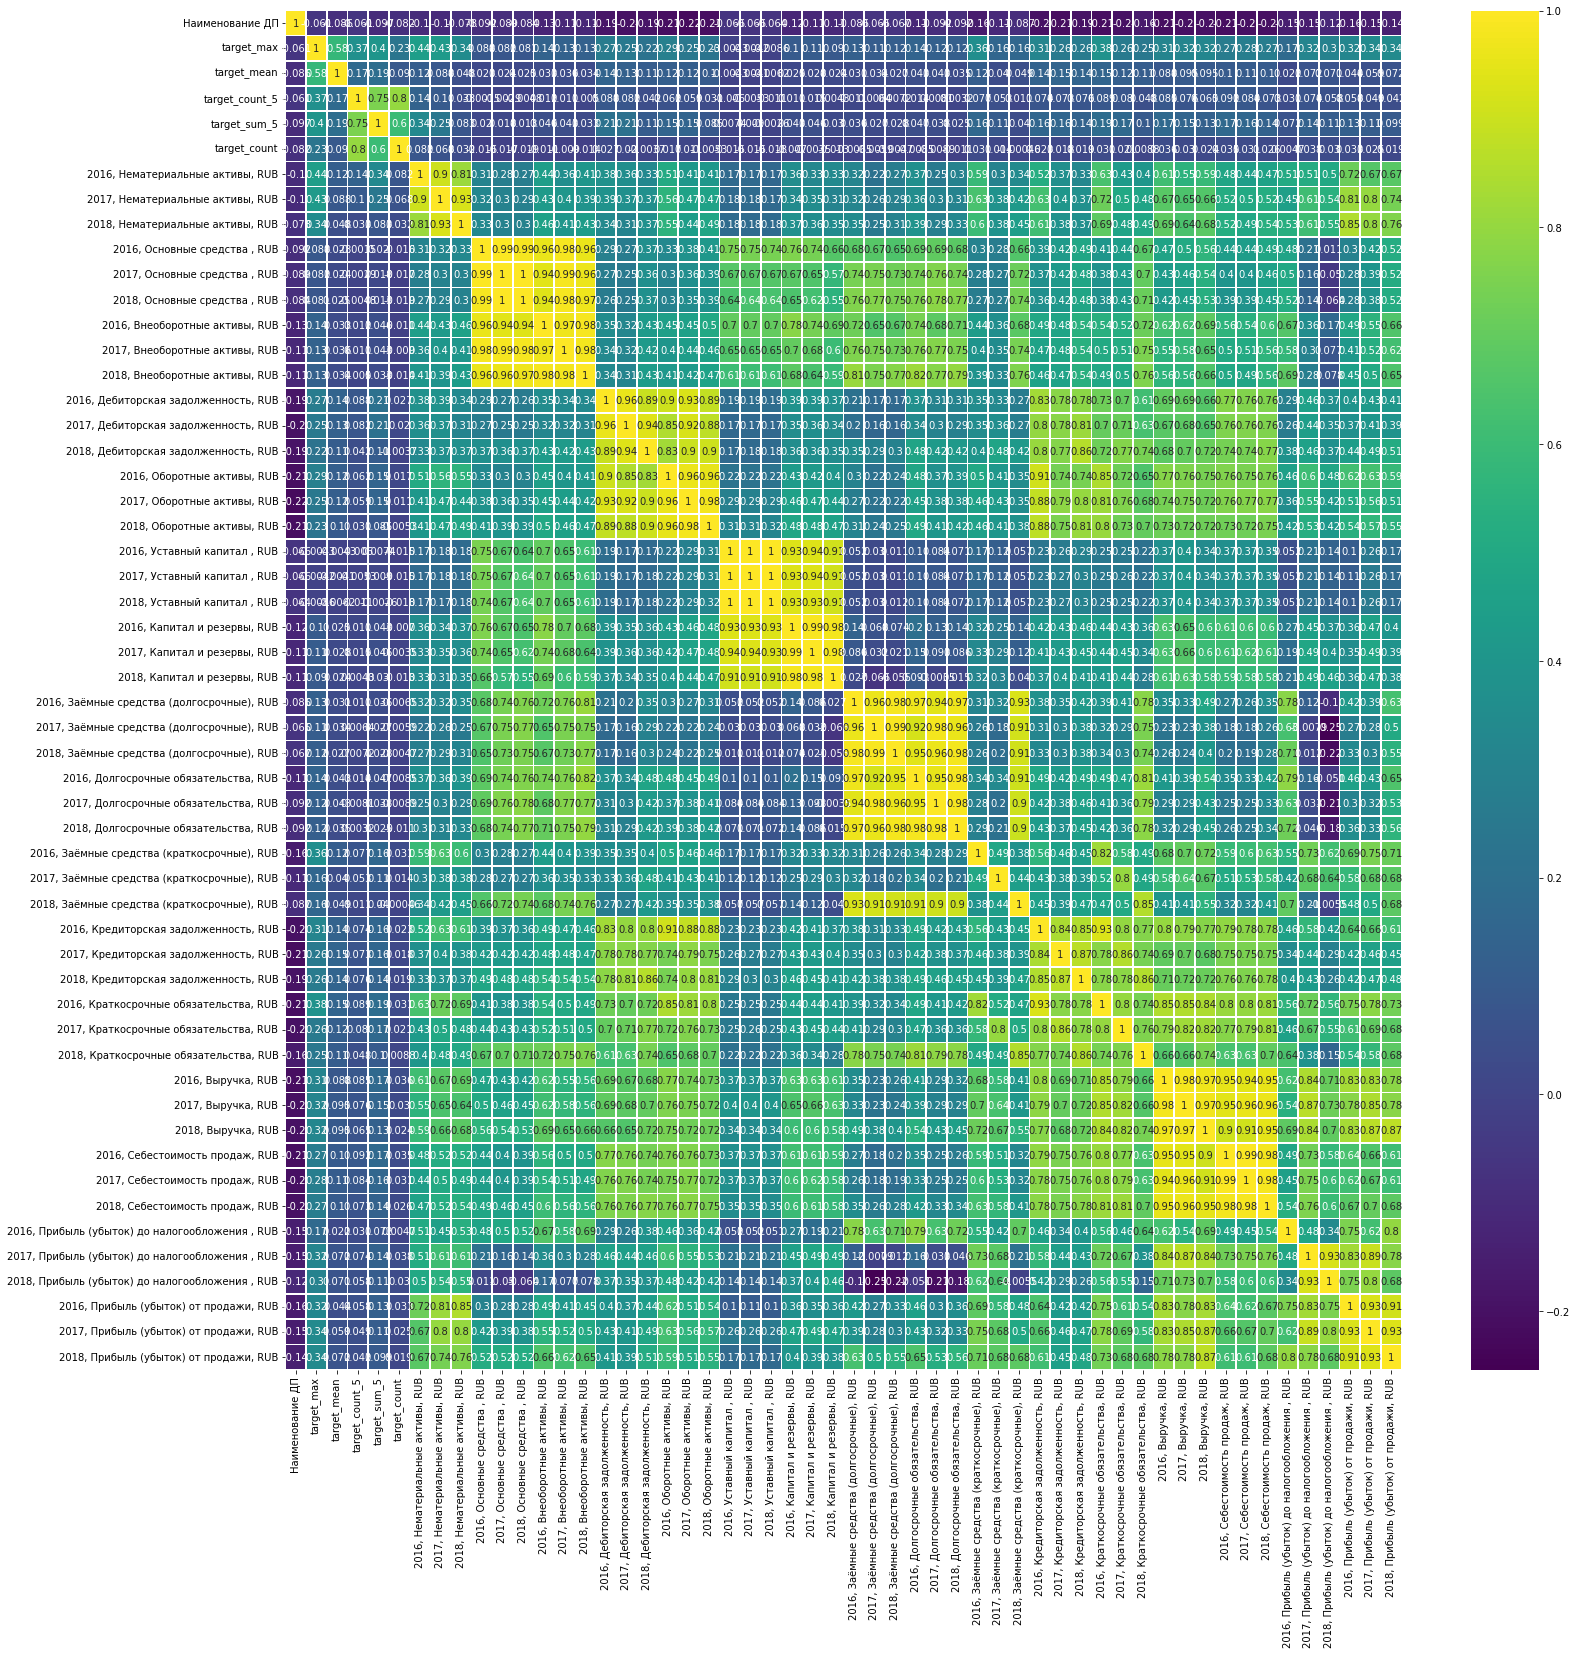

In [6]:
corremat = df19.corr()
plt.figure(figsize=(25,25))
g= sns.heatmap(df19.corr(),annot=True,cmap='viridis',linewidths=.5)

#plt.savefig('core_mat.png')

### Проверим, являются ли различия по годам по каждому признаку значимыми


In [12]:
p_value = 0.05
year = ['2016, ', '2017, ', '2018, ']
feature = ['Нематериальные активы, RUB', 'Основные средства , RUB', 'Внеоборотные активы, RUB','Дебиторская задолженность, RUB',
           'Оборотные активы, RUB', 'Уставный капитал , RUB' , 'Заёмные средства (долгосрочные), RUB',
          'Долгосрочные обязательства, RUB', 'Заёмные средства (краткосрочные), RUB', 'Капитал и резервы, RUB',
           'Кредиторская задолженность, RUB','Краткосрочные обязательства, RUB','Выручка, RUB', 'Себестоимость продаж, RUB',
          'Прибыль (убыток) до налогообложения , RUB', 'Прибыль (убыток) от продажи, RUB']
for i in feature:
    w, pv1 = stats.wilcoxon(df19[year[0] + i], df19[year[1] + i])
    w, pv2 = stats.wilcoxon(df19[year[1] + i], df19[year[2] + i])
    w, pv3 = stats.wilcoxon(df19[year[0] + i], df19[year[2] + i])
    
    if pv1 < p_value:
        print(i + year[0] + year[1])
    elif pv2 < p_value:
        print(i + year[1] + year[2])
    elif pv3 < p_value:
        print(i + year[0] + year[2])

Нематериальные активы, RUB2016, 2018, 
Основные средства , RUB2016, 2017, 
Внеоборотные активы, RUB2016, 2017, 
Дебиторская задолженность, RUB2016, 2017, 
Оборотные активы, RUB2016, 2017, 
Уставный капитал , RUB2016, 2017, 
Заёмные средства (долгосрочные), RUB2016, 2017, 
Долгосрочные обязательства, RUB2016, 2017, 
Заёмные средства (краткосрочные), RUB2016, 2017, 
Капитал и резервы, RUB2016, 2017, 
Кредиторская задолженность, RUB2016, 2017, 
Краткосрочные обязательства, RUB2016, 2017, 
Выручка, RUB2016, 2017, 
Себестоимость продаж, RUB2016, 2017, 
Прибыль (убыток) до налогообложения , RUB2017, 2018, 
Прибыль (убыток) от продажи, RUB2016, 2017, 


### Вывод:
Мы можем наблюдать, что из 48 тестов (16 уникальных признаков и 2016, 2017, 2018 годы) для большей части гипотеза значимости отвергается, т.е для модели можно использовать усредненное значение признаков по годам

## Внеоборотные активы
240 агентов (2016 год): Нематериальные активы + Основные средства = Внеоборотные активы 

In [23]:
t1 = df19[ '2016, Нематериальные активы, RUB'] + df19['2016, Основные средства , RUB']
t2 = df19['2016, Внеоборотные активы, RUB']
print('2016, Нематериальные активы, RUB + 2016, Основные средства , RUB == 2016, Внеоборотные активы, RUB: ', ((t2 - t1) == 0).sum())

2016, Нематериальные активы, RUB + 2016, Основные средства , RUB == 2016, Внеоборотные активы, RUB:  240


По теории (https://ru.wikipedia.org/wiki/Внеоборотные_активы) еще должны быть
- Доходные вложения в материальные ценности
- Финансовые вложения 

из них у 219 агентов "2016, Нематериальные активы, RUB" + "2017, Нематериальные активы, RUB" + "2018, Нематериальные активы, RUB" == 0


также из них у 42 агентов "2016, Основные средства , RUB" +
               "2017, Основные средства , RUB" +
               "2018, Основные средства , RUB" == 0 


также из них у 37 агентов "2016, Внеоборотные активы, RUB" +
                "2017, Внеоборотные активы, RUB" +
                "2018, Внеоборотные активы, RUB" == 0
                
также из них у 37 агентов за все года Основные + нематериальные + Внеоборотные == 0


In [24]:
col_group = []
for i in range(0, 50, 5):
    col_group.append(df19.columns[i : i + 10])
null_diff = df19[(t2 - t1) == 0]
null_diff[col_group[0]]
t = null_diff[["2016, Основные средства , RUB", 
               "2017, Основные средства , RUB",
               "2018, Основные средства , RUB"]].sum(axis=1)

t1 = null_diff[["2016, Нематериальные активы, RUB",
                "2017, Нематериальные активы, RUB", 
                "2018, Нематериальные активы, RUB"]].sum(axis=1)

t2 = null_diff[["2016, Внеоборотные активы, RUB",
                "2017, Внеоборотные активы, RUB",
                "2018, Внеоборотные активы, RUB"]].sum(axis=1)
print((t == 0).sum(), (t1 == 0).sum(), (t2 == 0).sum())

42 219 37


### Уставный капитал
У этих компаний либо 0(у всех практически), либо 6369.426752 (у троих) и 13375.796178. Но уставный капитал - это формальный покалатель, который говорит нам, начала ли компания свою деятельность (значение < 10000 => не начала). У некоторых тупейшая опечатка в уставном капитале, знак после запятой сдвинут. => Уставный капитал можно выбрасывать.

============================================================

Всего 18 объектов, у которых все признаки нулевые.
Как правило, по ним target_max нулевой, есть случаи с 6, 11 и 14 днями. Интересен случай с target_max 670 дней, это редкий случай, выброс. Можно посчитать вероятность его возникновения и решить, как оценить риск появления такого контрагента. В общем случае такое предсказать невозможно по имеющимся данными, поэтому из выборки выбрасываем. Остальных контрагентов со всеми нулевыми признаками тоже выбрасываем - будем по умолчанию считать, что если все показатели нулевые, то ПДЗ будет тоже нулевым - для модели; в реальности же на таких контрагентов надо обращать внимания и внимательнее изучать дополнительную информацию, которую можно раздобыть - такие контрагенты не кажутся надеждными

### Количество ПДЗ в интервалах 0-1-30-90-365-inf: 
#### (224, 242, 42, 11, 12)

In [27]:
df19['target_max'].between(0, 0).sum(),\
df19['target_max'].between(1, 30).sum(),\
df19['target_max'].between(31, 90).sum(),\
df19['target_max'].between(90, 365).sum(),\
df19['target_max'].between(365, 1e9).sum()

(224, 242, 42, 11, 12)

# Применим xgboost на данных без предобработки
В качестве модели выбран экстремальный градиентный бустинг, как один из самых эффективных методов, использующий дерево решений.
Используется grid search для подбора гиперпараметров\
**Градиентный бустинг**  - это мощный метод построения прогностических моделей.
В качестве метрики используется **Mean Absolute Error (MAE)**
Метрика измеряет среднюю сумму абсолютной разницы между фактическим значением и прогнозируемым значением

In [33]:
prep_data = {
               'Нематериальные активы, RUB':np.zeros(len(df19)),
               'Основные средства , RUB':np.zeros(len(df19)),
               'Внеоборотные активы, RUB':np.zeros(len(df19)),
               'Дебиторская задолженность, RUB':np.zeros(len(df19)),
               'Оборотные активы, RUB':np.zeros(len(df19)),
               'Уставный капитал , RUB':np.zeros(len(df19)),
               'Капитал и резервы, RUB':np.zeros(len(df19)),
               'Заёмные средства (долгосрочные), RUB':np.zeros(len(df19)),
               'Долгосрочные обязательства, RUB':np.zeros(len(df19)),
               'Заёмные средства (краткосрочные), RUB':np.zeros(len(df19)),
               'Кредиторская задолженность, RUB':np.zeros(len(df19)),
               'Краткосрочные обязательства, RUB':np.zeros(len(df19)),
               'Краткосрочные обязательства, RUB':np.zeros(len(df19)),
               'Выручка, RUB':np.zeros(len(df19)),
               'Себестоимость продаж, RUB':np.zeros(len(df19)),
               'Прибыль (убыток) до налогообложения , RUB':np.zeros(len(df19)),
               'Прибыль (убыток) от продажи, RUB':np.zeros(len(df19))
            }

prep_data = pd.DataFrame(prep_df19)

# Для следующих признаков даны данные за последние три года. Пока просто усредним. 
# Далее можно более старым данным давать меньшие веса 
N_YEARS = 3

for i, col_name in enumerate(prep_data.columns):
    
    #Проверка
    #print(col_name)
    #print(df19.columns[7+i*N_YEARS : 7+(i+1)*N_YEARS])
    
    prep_data[col_name] = df19.iloc[:, 7+i*N_YEARS : 7+(i+1)*N_YEARS].mean(axis=1)

In [36]:
X = prep_data
y = df19['target_max']
X

,"Нематериальные активы, RUB","Основные средства , RUB","Внеоборотные активы, RUB","Дебиторская задолженность, RUB","Оборотные активы, RUB","Уставный капитал , RUB","Капитал и резервы, RUB","Заёмные средства (долгосрочные), RUB","Долгосрочные обязательства, RUB","Заёмные средства (краткосрочные), RUB","Кредиторская задолженность, RUB","Краткосрочные обязательства, RUB","Выручка, RUB","Себестоимость продаж, RUB","Прибыль (убыток) до налогообложения , RUB","Прибыль (убыток) от продажи, RUB"
0,6.350070e+08,1.959216e+09,2.634895e+09,4.106067e+09,4.201391e+09,1.310607e+09,1.753430e+09,8.329257e+07,1.767314e+08,1.490816e+09,4.698332e+09,1.239406e+10,3.341153e+10,2.363908e+10,3.398068e+09,3.535869e+09
1,4.829469e+07,1.490121e+08,1.198463e+08,1.173484e+08,1.609028e+08,9.178556e+07,1.960223e+08,1.036093e+06,6.435669e+06,4.006008e+07,3.171338e+07,1.476382e+08,3.354930e+08,2.115452e+08,2.268195e+07,3.122452e+07
2,3.304605e+08,9.488100e+08,7.788539e+08,5.823580e+08,1.032982e+09,7.165713e+08,1.572713e+09,4.466030e+06,4.891720e+06,2.748960e+07,1.162374e+08,1.062719e+09,2.443298e+09,1.665996e+09,2.882705e+08,3.407102e+07
3,2.958042e+09,1.195098e+10,1.134929e+10,4.576792e+09,4.445211e+09,2.816401e+09,9.914652e+09,4.519052e+09,3.904859e+09,1.214837e+09,2.517492e+09,8.367714e+09,1.652964e+10,8.816477e+09,5.408344e+09,6.528265e+09
4,8.777527e+09,5.695991e+10,6.973101e+10,7.952982e+09,1.005638e+10,4.960525e+09,2.618064e+10,8.309518e+10,7.504756e+10,8.526590e+09,1.659222e+10,2.546213e+10,5.740107e+10,4.052190e+10,3.577460e+10,4.517754e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.000000e+00,2.802548e+05,1.131699e+07,2.995287e+07,4.368493e+07,2.182590e+05,5.114225e+06,1.557665e+07,1.290149e+07,1.104735e+07,3.966985e+07,5.561762e+07,8.197834e+07,5.147771e+07,2.708705e+06,3.837261e+06
527,5.445966e+07,1.520764e+08,1.399276e+08,2.281858e+08,3.939713e+08,3.010503e+08,3.036841e+08,1.099575e+06,1.836730e+06,3.306369e+07,1.435981e+08,5.932384e+08,1.231215e+09,7.412960e+08,1.261397e+08,1.057487e+08
528,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
529,3.867091e+06,2.285924e+07,1.948994e+08,1.325762e+08,2.662860e+08,3.178344e+05,7.714968e+07,1.175081e+08,1.161620e+08,6.378705e+07,2.952452e+08,2.608047e+08,2.021072e+08,5.934352e+07,7.631401e+07,1.390268e+08


## Подбор признаков


In [37]:
dtrain = xgb.DMatrix(X, label=y)

param = {'max_depth':0,
         'min_child_weight':0,
         'gamma':0,
         'subsample':0.8,
         'colsample_bytree':0.8,
         'reg_alpha':0,
         'learning_rate':0.05,
         'random_state':2022,
         'objective': 'reg:squaredlogerror',  
         'verbosity':0,
         'booster':'gbtree', 
         'eval_metric': 'mae'}

min_mae = np.inf

for md in [7,8,9]:
    for mcw in [5,6,7]:
        
        print("CV with md={}, mcw = {}".format(md, mcw))
    
        param['min_child_weight'] = mcw
        param['max_depth'] = md
    
        num_round = 550
    
        cv_results = xgb.cv(
                    param,
                    dtrain,
                    num_round,
                    #feval=None,
                    nfold=5,
                    #early_stopping_rounds=1,
                    verbose_eval = False,
                    maximize = False
                          )
    
        mean_mae = cv_results['test-mae-mean'].min()
        boost_rounds = cv_results['test-mae-mean'].argmin()
        print("\tmse {} for {} rounds\n".format(mean_mae, boost_rounds))
        if mean_mae < min_mae:
            min_mae = mean_mae
            best_param1 = md
            best_param2 = mcw

print('\nBEST: md = ', best_param1, ' mcw = ', best_param2)

CV with md=7, mcw = 5
	mse 27.382097199999997 for 120 rounds

CV with md=7, mcw = 6
	mse 27.375818 for 200 rounds

CV with md=7, mcw = 7
	mse 27.375383399999997 for 243 rounds

CV with md=8, mcw = 5
	mse 27.388926400000003 for 109 rounds

CV with md=8, mcw = 6
	mse 27.3838474 for 200 rounds

CV with md=8, mcw = 7
	mse 27.3678174 for 239 rounds

CV with md=9, mcw = 5
	mse 27.389950199999998 for 120 rounds

CV with md=9, mcw = 6
	mse 27.390788000000004 for 192 rounds

CV with md=9, mcw = 7
	mse 27.370225999999995 for 245 rounds


BEST: md =  8  mcw =  7


In [38]:
dtrain = xgb.DMatrix(X, label=y)

param = {'max_depth':8,
         'min_child_weight':6,
         'gamma':0,
         'subsample':0.8,
         'colsample_bytree':0.8,
         'reg_alpha':0,
         'learning_rate':0.05,
         'random_state':2022,
         'objective': 'reg:squaredlogerror',  
         'verbosity':0,
         'booster':'gbtree', 
         'eval_metric': 'mae'}

min_mae = np.inf

for g in [0, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
        
    print("CV with gamma={}".format(g))
    
    param['gamma'] = g
    
    num_round = 550
    
    cv_results = xgb.cv(
                    param,
                    dtrain,
                    num_round,
                    #feval=None,
                    nfold=5,
                    #early_stopping_rounds=1,
                    verbose_eval = False,
                    maximize = False
                          )
    
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tmse {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_param = g

print('\nBEST: gamma = ', best_param)

CV with gamma=0
	mse 27.3838474 for 200 rounds

CV with gamma=0.0001
	mse 27.3838474 for 200 rounds

CV with gamma=0.001
	mse 27.3838474 for 200 rounds

CV with gamma=0.01
	mse 27.3792022 for 200 rounds

CV with gamma=0.1
	mse 27.378483199999998 for 159 rounds

CV with gamma=1
	mse 27.3721356 for 200 rounds

CV with gamma=10
	mse 27.4156334 for 381 rounds


BEST: gamma =  1


In [39]:
dtrain = xgb.DMatrix(X, label=y)

param = {'max_depth':8,
         'min_child_weight':6,
         'gamma':0.0001,
         'subsample':0.8,
         'colsample_bytree':0.8,
         'reg_alpha':0,
         'learning_rate':0.05,
         'random_state':2022,
         'objective': 'reg:squaredlogerror',  
         'verbosity':0,
         'booster':'gbtree', 
         'eval_metric': 'mae'}

min_mae = np.inf

for s in [0.55, 0.6, 0.65]:
    for cbt in [0.55, 0.6, 0.65]:
        
        print("CV with s={}, cbt = {}".format(s, cbt))
    
        param['subsample'] = s
        param['colsample_bytree'] = cbt
    
        num_round = 550
    
        cv_results = xgb.cv(
                    param,
                    dtrain,
                    num_round,
                    #feval=None,
                    nfold=5,
                    #early_stopping_rounds=1,
                    verbose_eval = False,
                    maximize = False
                          )
    
        mean_mae = cv_results['test-mae-mean'].min()
        boost_rounds = cv_results['test-mae-mean'].argmin()
        print("\tmse {} for {} rounds\n".format(mean_mae, boost_rounds))
        if mean_mae < min_mae:
            min_mae = mean_mae
            best_param1 = s
            best_param2 = cbt

print('\nBEST: s = ', best_param1, ' cbt = ', best_param2)

CV with s=0.55, cbt = 0.55
	mse 27.362105799999995 for 218 rounds

CV with s=0.55, cbt = 0.6
	mse 27.376497399999998 for 218 rounds

CV with s=0.55, cbt = 0.65
	mse 27.3704274 for 219 rounds

CV with s=0.6, cbt = 0.55
	mse 27.379946800000006 for 395 rounds

CV with s=0.6, cbt = 0.6
	mse 27.3815764 for 201 rounds

CV with s=0.6, cbt = 0.65
	mse 27.3751578 for 246 rounds

CV with s=0.65, cbt = 0.55
	mse 27.382590600000004 for 211 rounds

CV with s=0.65, cbt = 0.6
	mse 27.3837136 for 193 rounds

CV with s=0.65, cbt = 0.65
	mse 27.396514000000003 for 188 rounds


BEST: s =  0.55  cbt =  0.55


In [40]:
dtrain = xgb.DMatrix(X, label=y)

param = {'max_depth':8,
         'min_child_weight':6,
         'gamma':0.0001,
         'subsample':0.65,
         'colsample_bytree':0.55,
         'reg_alpha':0,
         'learning_rate':0.05,
         'random_state':2022,
         'objective': 'reg:squaredlogerror',  
         'verbosity':0,
         'booster':'gbtree', 
         'eval_metric': 'mae'}

min_mae = np.inf

for a in [0, 0.00001, 0.0001, 0.001, 0.01, 0.1]:
        
    #print("CV with alpha={}".format(a))
    
    param['reg_alpha'] = a
    
    num_round = 550
    
    cv_results = xgb.cv(
                    param,
                    dtrain,
                    num_round,
                    #feval=None,
                    nfold=5,
                    #early_stopping_rounds=1,
                    verbose_eval = False,
                    maximize = False
                          )
    
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    #print("\tmse {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_param1 = a

print('\nBEST: alpha = ', best_param1)


BEST: alpha =  0.001


In [41]:
dtrain = xgb.DMatrix(X, label=y)

param = {'max_depth':8,
         'min_child_weight':6,
         'gamma':0.0001,
         'subsample':0.65,
         'colsample_bytree':0.55,
         'reg_alpha':0,
         'learning_rate':0.05,
         'random_state':2022,
         'objective': 'reg:squaredlogerror',  
         'verbosity':0,
         'booster':'gbtree', 
         'eval_metric': 'mae'}

dtrain = xgb.DMatrix(X, label=y)

num_round = 500000

print(xgb.cv(param, dtrain, num_round, 
             #feval=None,
             nfold=5,
             early_stopping_rounds=500,
            verbose_eval = True,
            maximize = False))

[0]	train-mae:27.65683+1.49862	test-mae:27.66247+6.01190
[1]	train-mae:27.64660+1.49852	test-mae:27.65725+6.01098
[2]	train-mae:27.63628+1.49747	test-mae:27.65063+6.00914
[3]	train-mae:27.62581+1.49749	test-mae:27.64569+6.00697
[4]	train-mae:27.61546+1.49669	test-mae:27.63966+6.00489
[5]	train-mae:27.60486+1.49662	test-mae:27.63427+6.00375
[6]	train-mae:27.59409+1.49616	test-mae:27.62808+6.00257
[7]	train-mae:27.58302+1.49558	test-mae:27.62150+5.99912
[8]	train-mae:27.57169+1.49548	test-mae:27.61475+5.99764
[9]	train-mae:27.56111+1.49523	test-mae:27.60875+5.99496
[10]	train-mae:27.54977+1.49438	test-mae:27.60233+5.99232
[11]	train-mae:27.53791+1.49345	test-mae:27.59628+5.99106
[12]	train-mae:27.52683+1.49319	test-mae:27.59083+5.98985
[13]	train-mae:27.51617+1.49295	test-mae:27.58556+5.98772
[14]	train-mae:27.50561+1.49272	test-mae:27.57923+5.98462
[15]	train-mae:27.49471+1.49205	test-mae:27.57357+5.98265
[16]	train-mae:27.48428+1.49199	test-mae:27.56872+5.98027
[17]	train-mae:27.47347+

### Обучаем модель с полученными параметрами

In [42]:
dtrain = xgb.DMatrix(X, label=y)

param = {'max_depth':8,
         'min_child_weight':6,
         'gamma':0.0001,
         'subsample':0.65,
         'colsample_bytree':0.55,
         'reg_alpha':0,
         'learning_rate':0.05,
         'random_state':2022,
         'objective': 'reg:squaredlogerror',  
         'verbosity':0,
         'booster':'gbtree', 
         'eval_metric': 'mae'}

num_round = 218

bst = xgb.train(param, dtrain, num_round)
importance = bst.get_fscore()
dict(sorted(importance.items(), key=lambda item: item[1], reverse=True))

{'Прибыль (убыток) от продажи, RUB': 109.0,
 'Внеоборотные активы, RUB': 81.0,
 'Кредиторская задолженность, RUB': 80.0,
 'Нематериальные активы, RUB': 79.0,
 'Основные средства , RUB': 78.0,
 'Уставный капитал , RUB': 72.0,
 'Прибыль (убыток) до налогообложения , RUB': 72.0,
 'Оборотные активы, RUB': 71.0,
 'Дебиторская задолженность, RUB': 69.0,
 'Долгосрочные обязательства, RUB': 68.0,
 'Заёмные средства (долгосрочные), RUB': 67.0,
 'Капитал и резервы, RUB': 57.0,
 'Выручка, RUB': 56.0,
 'Себестоимость продаж, RUB': 46.0,
 'Заёмные средства (краткосрочные), RUB': 42.0,
 'Краткосрочные обязательства, RUB': 42.0}

### Используем данные 2020 года, как тестовые. Пока выбрасываем "Факты"

In [44]:
df20.columns[62:]

Index(['Макс. ПДЗ за 2020 год, дней', 'Сред. ПДЗ за 2020 год, дней',
       'Кол-во просрочек свыше 5-ти дней за 2020 год, шт.',
       'Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.',
       'Кол-во раз ПДЗ за 2020 год, шт.', '2016, Нематериальные активы, RUB',
       '2017, Нематериальные активы, RUB', '2018, Нематериальные активы, RUB',
       '2019, Нематериальные активы, RUB', '2016, Основные средства , RUB',
       '2017, Основные средства , RUB', '2018, Основные средства , RUB',
       '2019, Основные средства , RUB', '2016, Внеоборотные активы, RUB',
       '2017, Внеоборотные активы, RUB', '2018, Внеоборотные активы, RUB',
       '2019, Внеоборотные активы, RUB',
       '2016, Дебиторская задолженность, RUB',
       '2017, Дебиторская задолженность, RUB',
       '2018, Дебиторская задолженность, RUB',
       '2019, Дебиторская задолженность, RUB', '2016, Оборотные активы, RUB',
       '2017, Оборотные активы, RUB', '2018, Оборотные активы, RUB',
       '2019, Оборотные акт

In [45]:
prep_data20 = {
               'Нематериальные активы, RUB':np.zeros(len(df19)),
               'Основные средства , RUB':np.zeros(len(df19)),
               'Внеоборотные активы, RUB':np.zeros(len(df19)),
               'Дебиторская задолженность, RUB':np.zeros(len(df19)),
               'Оборотные активы, RUB':np.zeros(len(df19)),
               'Уставный капитал , RUB':np.zeros(len(df19)),
               'Капитал и резервы, RUB':np.zeros(len(df19)),
               'Заёмные средства (долгосрочные), RUB':np.zeros(len(df19)),
               'Долгосрочные обязательства, RUB':np.zeros(len(df19)),
               'Заёмные средства (краткосрочные), RUB':np.zeros(len(df19)),
               'Кредиторская задолженность, RUB':np.zeros(len(df19)),
               'Краткосрочные обязательства, RUB':np.zeros(len(df19)),
               'Краткосрочные обязательства, RUB':np.zeros(len(df19)),
               'Выручка, RUB':np.zeros(len(df19)),
               'Себестоимость продаж, RUB':np.zeros(len(df19)),
               'Прибыль (убыток) до налогообложения , RUB':np.zeros(len(df19)),
               'Прибыль (убыток) от продажи, RUB':np.zeros(len(df19))
            }


prep_data20 = pd.DataFrame(prep_data20)

# Для следующих признаков даны данные за последние три года. Пока просто усредним. 
# Далее можно более старым данным давать меньшие веса 
N_YEARS = 4

for i, col_name in enumerate(prep_data20.columns):
    
    #Проверка
#     print(col_name)
#     print(df1920.columns[67+i*N_YEARS : 67+(i+1)*N_YEARS])
    
    prep_data20[col_name] = df20.iloc[:, 67+i*N_YEARS : 67+(i+1)*N_YEARS].mean(axis=1)

In [47]:
X = prep_data20
y = df20['Макс. ПДЗ за 2020 год, дней']
X

,"Нематериальные активы, RUB","Основные средства , RUB","Внеоборотные активы, RUB","Дебиторская задолженность, RUB","Оборотные активы, RUB","Уставный капитал , RUB","Капитал и резервы, RUB","Заёмные средства (долгосрочные), RUB","Долгосрочные обязательства, RUB","Заёмные средства (краткосрочные), RUB","Кредиторская задолженность, RUB","Краткосрочные обязательства, RUB","Выручка, RUB","Себестоимость продаж, RUB","Прибыль (убыток) до налогообложения , RUB","Прибыль (убыток) от продажи, RUB"
0,7.019586e+06,2.361198e+09,2.496804e+09,3.608682e+09,5.528987e+09,6.294000e+08,3.199586e+09,0.000000e+00,2.641389e+08,9.809793e+07,4.372216e+09,4.562065e+09,3.442275e+10,2.901013e+10,3.424333e+09,3.502682e+09
1,2.563694e+04,1.547537e+08,1.559083e+08,1.082104e+08,2.510303e+08,1.345860e+06,3.096704e+08,0.000000e+00,4.582325e+06,5.081083e+07,4.187500e+07,9.268583e+07,4.451033e+08,3.407973e+08,3.783599e+07,4.321497e+07
2,7.250478e+06,9.676174e+08,1.065446e+09,2.546639e+08,1.300996e+09,1.964459e+07,2.170833e+09,0.000000e+00,7.018312e+06,0.000000e+00,1.025237e+08,1.885898e+08,2.708150e+09,2.248519e+09,7.674379e+07,9.056990e+07
3,0.000000e+00,1.252779e+10,1.595043e+10,4.401392e+09,6.750036e+09,1.727452e+07,1.306756e+10,5.149313e+09,6.033572e+09,1.395268e+09,1.865407e+09,3.599337e+09,1.878676e+10,1.130403e+10,4.855518e+09,5.497220e+09
4,4.797771e+05,2.901794e+10,1.091794e+11,7.673257e+09,1.341193e+10,5.955414e+05,9.369353e+09,8.600600e+10,8.767851e+10,2.035947e+10,4.637908e+09,2.554344e+10,7.349213e+10,2.499646e+10,5.129464e+10,4.249136e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.000000e+00,5.127389e+05,5.127389e+05,2.825207e+07,7.211162e+07,6.369427e+03,6.675159e+06,2.112054e+07,2.112054e+07,0.000000e+00,4.482866e+07,4.482866e+07,1.408592e+08,1.297788e+08,5.888535e+06,7.397771e+06
527,2.754777e+04,1.368288e+08,1.549865e+08,1.387022e+08,4.403073e+08,2.406433e+08,4.278105e+08,0.000000e+00,2.401433e+06,0.000000e+00,1.410561e+08,1.650818e+08,1.265121e+09,1.039574e+09,1.134900e+08,1.075928e+08
528,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
529,8.121019e+03,1.256354e+07,2.720379e+08,1.652191e+08,4.276393e+08,7.006369e+03,1.023395e+08,1.183549e+08,1.335387e+08,9.970064e+06,4.538290e+08,4.637990e+08,3.394320e+08,1.795151e+08,6.745334e+07,1.060939e+08


In [48]:
dtest = xgb.DMatrix(X)
pred = bst.predict(dtest)
sklearn.metrics.mean_absolute_error(list(y), pred)

26.054538081924512

### Baseline test_mae: 26.054538081924512

# Вывод:
XGBoost работает недостаточно хорошо